In [1]:
"""
[K-Nearnest Neighbor Classifier]
k-nearnest neighbor (KNN) is a lazy learner. It's won't learn discriminative function from training data, istead it will remember 
training data.
Also, it is a nonparametric model, it is a instance-based learning. It will remember training data, and no constant features.
(Parametric model is learn a function from training data, then we can predict w/o training data.)
(Decision tree classifier/random forest and Kernel SVM is nonparametric. Linear SVM, perceptron, logistic regression is parametric.)
* The pro of memory-based is collect new training set, the classfier is also updated.
* The cons of memory-based is some worst situations computational complexity will be linearly increment and need big storage space for 
  big training data.
Because of curse of dimensionality, KNN is easy to overfit. Curse of dimensionality is too much features, so the feature space is sparse.
KNN (also decision tree) can't apply regularization to prevent overfitting, so they need to use dimensionality reduction.

Steps:
1. Find k & distance metric.
2. Find k nearest neighbor samples we want to classfy.
3. Using majority voting to predict labels.
    If have same number of voting, it will use the nearest sample's label. If 2 or more same distance nearest samples, it will use the
    first found nearest sample's label.
"""
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from shared import Plot

In [2]:
# Get Iris data
"""
Features:
0 => sepal length in cm
1 => sepal width in cm
2 => petal length in cm
3 => petal width in cm


Target labels:
1 => Iris-Setosa
2 => Iris-Versicolor
3 => Iris-Virginica
"""
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [3]:
# Get training & test data
"""
Settings:
30 % for test, 70 % for training
"""
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [4]:
# Standarized
sc = StandardScaler()
sc.fit(X_train)  # Compute the mean and std to be used for later scaling
X_train_std = sc.transform(X_train)  # Standarized X_train
X_test_std = sc.transform(X_test)  # Standarized X_test

In [5]:
# K-nearest neighbors classifier
"""
Minkowski distance metric is normalized Euclidean distance (L2-distance) and Manhattan distance (L1-distance, only diagonals):
d(Xi, Xj) = sqrt[p](Sum[k]|xi(k), xj(k)| ^ p)
p = 2 is L2-distance, p = 1 is L1-distance
"""
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Plot results...


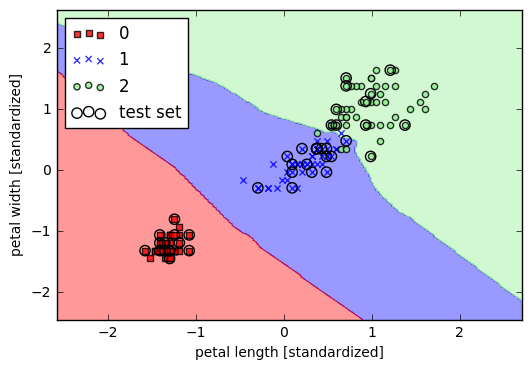

In [6]:
# Plot results
print('Plot results...')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
Plot.plot_decision_regions(X=X_combined_std, y=y_combined,
                           classifier=knn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()